In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from statsmodels.stats.multitest import multipletests
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/wordcloud')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

In [2]:
data = pkl.load(open(pjoin(anal_dir, 'RSM/HCPY_PC12-abs-corr-beh.pkl'), 'rb'))
sig_idx_arr = data['p'] < 0.05
c1_m_dict = {}
c2_m_dict = {}
c1_t_dict = {}
c2_t_dict = {}
c1_dict = {}
c2_dict = {}
c12_dict = {}
for col_idx, col in enumerate(data['col_name']):
    rs = np.abs(data['r'])
    if sig_idx_arr[0, col_idx]:
        c1_m_dict[col] = rs[0, col_idx]
    if sig_idx_arr[1, col_idx]:
        c2_m_dict[col] = rs[1, col_idx]
    if sig_idx_arr[2, col_idx]:
        c1_t_dict[col] = rs[2, col_idx]
    if sig_idx_arr[3, col_idx]:
        c2_t_dict[col] = rs[3, col_idx]
    if sig_idx_arr[0, col_idx] and sig_idx_arr[2, col_idx]:
        c1_dict[col] = np.mean([rs[0, col_idx], rs[2, col_idx]])
    if sig_idx_arr[1, col_idx] and sig_idx_arr[3, col_idx]:
        c2_dict[col] = np.mean([rs[1, col_idx], rs[3, col_idx]])
    if np.all(sig_idx_arr[:, col_idx]):
        c12_dict[col] = np.mean(rs[:, col_idx])

wc = WordCloud(background_color='white', width=900, height=600)

C1 myelination: 102


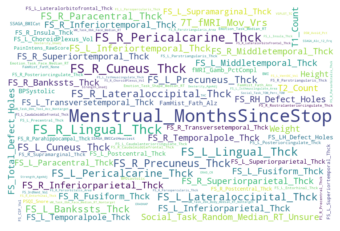

In [3]:
print('C1 myelination:', len(c1_m_dict))
wc.generate_from_frequencies(c1_m_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c1_m.jpg'))

In [4]:
keys = np.array(list(c1_m_dict.keys()))
values = np.array(list(c1_m_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    v = data['r'][0, data['col_name'].index(k)]
    print('{}: {:.2f}'.format(k, v))

Menstrual_MonthsSinceStop: -0.64
FS_R_Lingual_Thck: 0.28
FS_R_Cuneus_Thck: 0.27


C2 myelination: 104


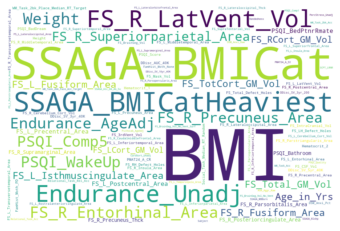

In [5]:
print('C2 myelination:', len(c2_m_dict))
wc.generate_from_frequencies(c2_m_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c2_m.jpg'))

In [6]:
keys = np.array(list(c2_m_dict.keys()))
values = np.array(list(c2_m_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    v = data['r'][1, data['col_name'].index(k)]
    print('{}: {:.2f}'.format(k, v))

BMI: 0.20
SSAGA_BMICat: 0.18
SSAGA_BMICatHeaviest: 0.17


C1 thickness: 237


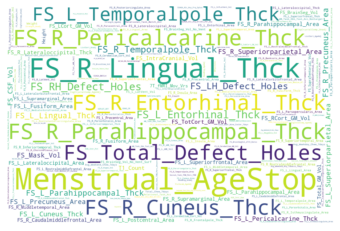

In [7]:
print('C1 thickness:', len(c1_t_dict))
wc.generate_from_frequencies(c1_t_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c1_t.jpg'))

In [8]:
keys = np.array(list(c1_t_dict.keys()))
values = np.array(list(c1_t_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    v = data['r'][2, data['col_name'].index(k)]
    print('{}: {:.2f}'.format(k, v))

Menstrual_AgeStop: 0.40
FS_R_Lingual_Thck: -0.32
FS_R_Parahippocampal_Thck: 0.30


C2 thickness: 315


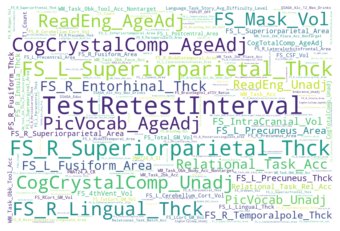

In [9]:
print('C2 thickness:', len(c2_t_dict))
wc.generate_from_frequencies(c2_t_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c2_t.jpg'))

In [10]:
keys = np.array(list(c2_t_dict.keys()))
values = np.array(list(c2_t_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    v = data['r'][3, data['col_name'].index(k)]
    print('{}: {:.2f}'.format(k, v))

TestRetestInterval: -0.32
FS_R_Superiorparietal_Thck: -0.28
FS_L_Superiorparietal_Thck: -0.26


C1: 66


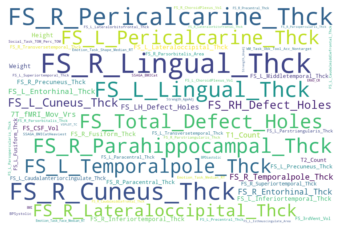

In [11]:
print('C1:', len(c1_dict))
wc.generate_from_frequencies(c1_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c1.jpg'))

In [12]:
keys = np.array(list(c1_dict.keys()))
values = np.array(list(c1_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    print('{}: {:.2f}'.format(k, v))

FS_R_Lingual_Thck: 0.30
FS_R_Pericalcarine_Thck: 0.27
FS_R_Cuneus_Thck: 0.27


C2: 74


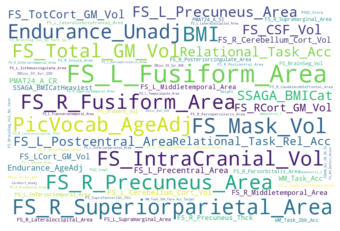

In [13]:
print('C2:', len(c2_dict))
wc.generate_from_frequencies(c2_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c2.jpg'))

In [14]:
keys = np.array(list(c2_dict.keys()))
values = np.array(list(c2_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    print('{}: {:.2f}'.format(k, v))

FS_L_Fusiform_Area: 0.15
FS_R_Superiorparietal_Area: 0.14
FS_Mask_Vol: 0.14


C12: 11


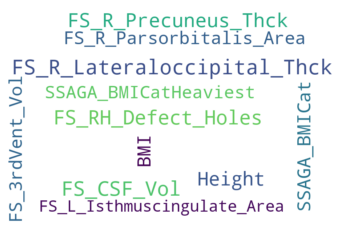

In [15]:
print('C12:', len(c12_dict))
wc.generate_from_frequencies(c12_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'c12.jpg'))

In [16]:
keys = np.array(list(c12_dict.keys()))
values = np.array(list(c12_dict.values()))
indices = np.argsort(values)[::-1][:3]
for k, v in zip(keys[indices], values[indices]):
    print('{}: {:.2f}'.format(k, v))

FS_R_Lateraloccipital_Thck: 0.14
FS_CSF_Vol: 0.13
FS_RH_Defect_Holes: 0.13


117


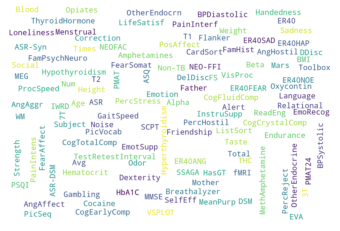

In [32]:
prefix_list = [i.split('_')[0] for i in data['col_name']]
prefix_uniq = set(prefix_list)
print(len(prefix_uniq))
prefix_dict = {}
for i in prefix_uniq:
    prefix_dict[i] = 1
wc = WordCloud(background_color='white', width=1500, height=1000, min_font_size=35, max_font_size=35)
wc.generate_from_frequencies(prefix_dict)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(pjoin(work_dir, 'beh_prefix.jpg'))